In [84]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [85]:
df = pd.read_csv('final_high_rank_data.csv')
df.head()

,Unnamed: 0,game_duration,game_ended_in_surrender,game_ended_in_early_surrender,blue_side_won,total_blue_side_minions_killed,total_blue_side_kills,total_blue_side_deaths,total_blue_side_assists,total_blue_side_gold_earned,...,total_red_side_gold_spent,total_red_side_ward_takedowns,total_red_side_wards_placed,total_red_side_vision_score,total_towers_destroyed_by_red,total_inhibitors_destroyed_by_red,total_red_side_dragons_killed,total_red_side_horde,total_red_side_baron,total_red_side_riftHerald
0,0,1331,False,False,False,537,9,41,15,37713,...,42450,9,37,82,11,3,2,0,0,1
1,0,1552,True,False,False,759,14,21,20,44515,...,45900,26,43,146,8,2,2,0,1,0
2,0,917,True,False,True,506,24,8,22,36436,...,21400,4,33,59,0,0,0,0,0,0
3,0,915,True,False,True,561,24,8,22,34724,...,24112,5,36,62,0,0,0,0,0,0
4,0,2132,False,False,False,1051,28,36,31,65737,...,68875,52,64,230,10,1,4,0,2,1


In [86]:
df=df.drop(['Unnamed: 0'], axis=1)

In [87]:
df

,game_duration,game_ended_in_surrender,game_ended_in_early_surrender,blue_side_won,total_blue_side_minions_killed,total_blue_side_kills,total_blue_side_deaths,total_blue_side_assists,total_blue_side_gold_earned,total_blue_side_gold_spent,...,total_red_side_gold_spent,total_red_side_ward_takedowns,total_red_side_wards_placed,total_red_side_vision_score,total_towers_destroyed_by_red,total_inhibitors_destroyed_by_red,total_red_side_dragons_killed,total_red_side_horde,total_red_side_baron,total_red_side_riftHerald
0,1331,False,False,False,537,9,41,15,37713,34375,...,42450,9,37,82,11,3,2,0,0,1
1,1552,True,False,False,759,14,21,20,44515,43220,...,45900,26,43,146,8,2,2,0,1,0
2,917,True,False,True,506,24,8,22,36436,30735,...,21400,4,33,59,0,0,0,0,0,0
3,915,True,False,True,561,24,8,22,34724,29625,...,24112,5,36,62,0,0,0,0,0,0
4,2132,False,False,False,1051,28,36,31,65737,67345,...,68875,52,64,230,10,1,4,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6922,1960,False,False,False,978,29,35,52,60888,57300,...,65670,27,80,222,10,2,4,0,1,1
6923,1997,False,False,False,937,32,28,47,66587,65625,...,60985,25,79,185,7,1,4,0,1,0
6924,2195,False,False,False,1017,47,45,69,78831,71360,...,74960,39,87,225,9,2,2,2,2,0
6925,1336,True,False,True,748,31,15,58,49786,47300,...,36325,19,45,112,2,0,0,3,0,0


In [88]:
df.describe()

,game_duration,total_blue_side_minions_killed,total_blue_side_kills,total_blue_side_deaths,total_blue_side_assists,total_blue_side_gold_earned,total_blue_side_gold_spent,total_blue_side_wards_killed,total_blue_side_wards_placed,total_blue_side_vision_score,...,total_red_side_gold_spent,total_red_side_ward_takedowns,total_red_side_wards_placed,total_red_side_vision_score,total_towers_destroyed_by_red,total_inhibitors_destroyed_by_red,total_red_side_dragons_killed,total_red_side_horde,total_red_side_baron,total_red_side_riftHerald
count,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,...,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000
mean,1537.727588,758.532987,25.156345,26.020211,39.208171,52063.235455,47936.459795,19.588855,60.554208,142.570954,...,48384.906309,19.872817,61.211347,145.457196,5.501805,0.749531,1.926375,2.040855,0.515952,0.388191
std,371.293485,188.856500,11.109512,10.982274,20.839692,14593.509406,13883.732082,10.712766,21.487398,54.006298,...,13782.236943,10.622910,21.798173,54.875825,3.536692,1.009659,1.259813,2.032207,0.650417,0.487374
min,101.000000,0.000000,0.000000,0.000000,0.000000,2500.000000,1950.000000,0.000000,0.000000,0.000000,...,1850.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1332.000000,648.000000,17.000000,18.000000,23.000000,42606.500000,39237.000000,12.000000,46.000000,106.000000,...,40036.000000,12.000000,46.000000,108.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1551.000000,764.000000,25.000000,26.000000,38.000000,53284.000000,48695.000000,18.000000,60.000000,141.000000,...,49175.000000,19.000000,60.000000,144.000000,5.000000,0.000000,2.000000,2.000000,0.000000,0.000000
75%,1774.000000,878.000000,33.000000,34.000000,53.000000,61853.500000,56941.500000,26.000000,74.000000,177.000000,...,57299.000000,26.000000,74.000000,180.000000,9.000000,1.000000,3.000000,3.000000,1.000000,1.000000
max,2884.000000,1468.000000,68.000000,66.000000,132.000000,98072.000000,97735.000000,79.000000,188.000000,367.000000,...,100630.000000,83.000000,169.000000,451.000000,11.000000,7.000000,6.000000,6.000000,4.000000,1.000000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6927 entries, 0 to 6926
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   game_duration                       6927 non-null   int64
 1   game_ended_in_surrender             6927 non-null   bool 
 2   game_ended_in_early_surrender       6927 non-null   bool 
 3   blue_side_won                       6927 non-null   bool 
 4   total_blue_side_minions_killed      6927 non-null   int64
 5   total_blue_side_kills               6927 non-null   int64
 6   total_blue_side_deaths              6927 non-null   int64
 7   total_blue_side_assists             6927 non-null   int64
 8   total_blue_side_gold_earned         6927 non-null   int64
 9   total_blue_side_gold_spent          6927 non-null   int64
 10  total_blue_side_wards_killed        6927 non-null   int64
 11  total_blue_side_wards_placed        6927 non-null   int64
 12  total_

In [90]:
df.shape

(6927, 34)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6927 entries, 0 to 6926
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   game_duration                       6927 non-null   int64
 1   game_ended_in_surrender             6927 non-null   bool 
 2   game_ended_in_early_surrender       6927 non-null   bool 
 3   blue_side_won                       6927 non-null   bool 
 4   total_blue_side_minions_killed      6927 non-null   int64
 5   total_blue_side_kills               6927 non-null   int64
 6   total_blue_side_deaths              6927 non-null   int64
 7   total_blue_side_assists             6927 non-null   int64
 8   total_blue_side_gold_earned         6927 non-null   int64
 9   total_blue_side_gold_spent          6927 non-null   int64
 10  total_blue_side_wards_killed        6927 non-null   int64
 11  total_blue_side_wards_placed        6927 non-null   int64
 12  total_

In [92]:
df.describe()

,game_duration,total_blue_side_minions_killed,total_blue_side_kills,total_blue_side_deaths,total_blue_side_assists,total_blue_side_gold_earned,total_blue_side_gold_spent,total_blue_side_wards_killed,total_blue_side_wards_placed,total_blue_side_vision_score,...,total_red_side_gold_spent,total_red_side_ward_takedowns,total_red_side_wards_placed,total_red_side_vision_score,total_towers_destroyed_by_red,total_inhibitors_destroyed_by_red,total_red_side_dragons_killed,total_red_side_horde,total_red_side_baron,total_red_side_riftHerald
count,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,...,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000
mean,1537.727588,758.532987,25.156345,26.020211,39.208171,52063.235455,47936.459795,19.588855,60.554208,142.570954,...,48384.906309,19.872817,61.211347,145.457196,5.501805,0.749531,1.926375,2.040855,0.515952,0.388191
std,371.293485,188.856500,11.109512,10.982274,20.839692,14593.509406,13883.732082,10.712766,21.487398,54.006298,...,13782.236943,10.622910,21.798173,54.875825,3.536692,1.009659,1.259813,2.032207,0.650417,0.487374
min,101.000000,0.000000,0.000000,0.000000,0.000000,2500.000000,1950.000000,0.000000,0.000000,0.000000,...,1850.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1332.000000,648.000000,17.000000,18.000000,23.000000,42606.500000,39237.000000,12.000000,46.000000,106.000000,...,40036.000000,12.000000,46.000000,108.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1551.000000,764.000000,25.000000,26.000000,38.000000,53284.000000,48695.000000,18.000000,60.000000,141.000000,...,49175.000000,19.000000,60.000000,144.000000,5.000000,0.000000,2.000000,2.000000,0.000000,0.000000
75%,1774.000000,878.000000,33.000000,34.000000,53.000000,61853.500000,56941.500000,26.000000,74.000000,177.000000,...,57299.000000,26.000000,74.000000,180.000000,9.000000,1.000000,3.000000,3.000000,1.000000,1.000000
max,2884.000000,1468.000000,68.000000,66.000000,132.000000,98072.000000,97735.000000,79.000000,188.000000,367.000000,...,100630.000000,83.000000,169.000000,451.000000,11.000000,7.000000,6.000000,6.000000,4.000000,1.000000


In [93]:
corr = df.corr()
corr['blue_side_won'].sort_values(ascending=False)

blue_side_won                         1.000000
total_towers_destroyed_by_blue        0.738441
total_inhibitors_destroyed_by_blue    0.627346
total_blue_side_kills                 0.531936
total_red_side_deaths                 0.530459
total_blue_side_baron                 0.496918
total_blue_side_assists               0.488437
total_blue_side_dragons_killed        0.483932
total_blue_side_gold_earned           0.310891
total_blue_side_riftHerald            0.298789
total_blue_side_gold_spent            0.187996
total_blue_side_horde                 0.151560
total_blue_side_minions_killed        0.141168
total_blue_side_vision_score          0.130203
total_blue_side_wards_killed          0.084555
total_blue_side_wards_placed          0.065308
game_ended_in_early_surrender         0.006686
game_duration                        -0.001273
game_ended_in_surrender              -0.044285
total_red_side_wards_placed          -0.055731
total_red_side_ward_takedowns        -0.078521
total_red_sid

# EDA

c:\Users\madna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


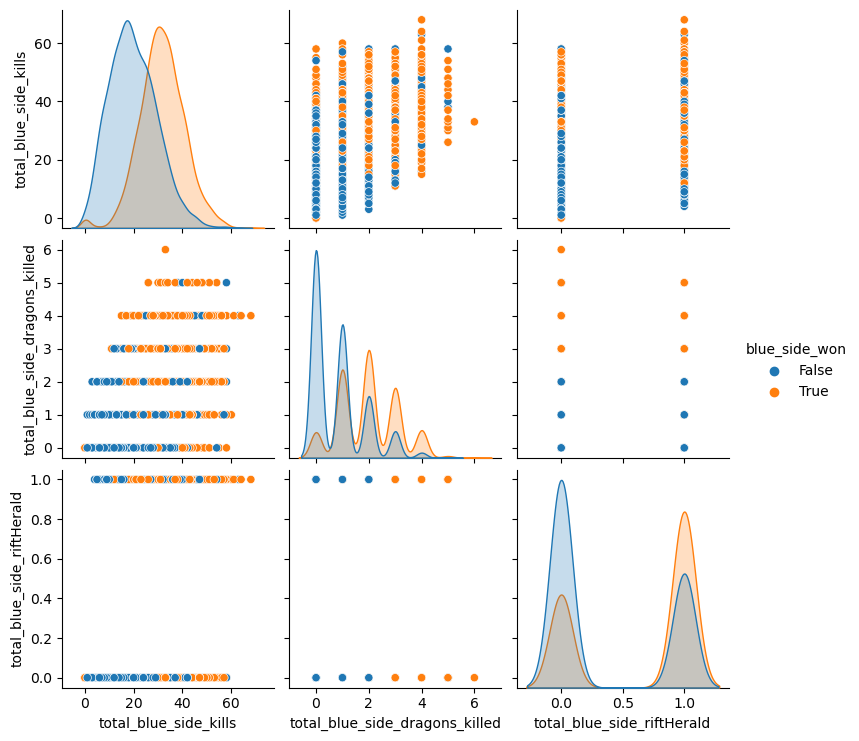

In [94]:
sns.pairplot(data=df, vars=('total_blue_side_kills', 'total_blue_side_dragons_killed', 'total_blue_side_riftHerald'), hue='blue_side_won')
plt.show()

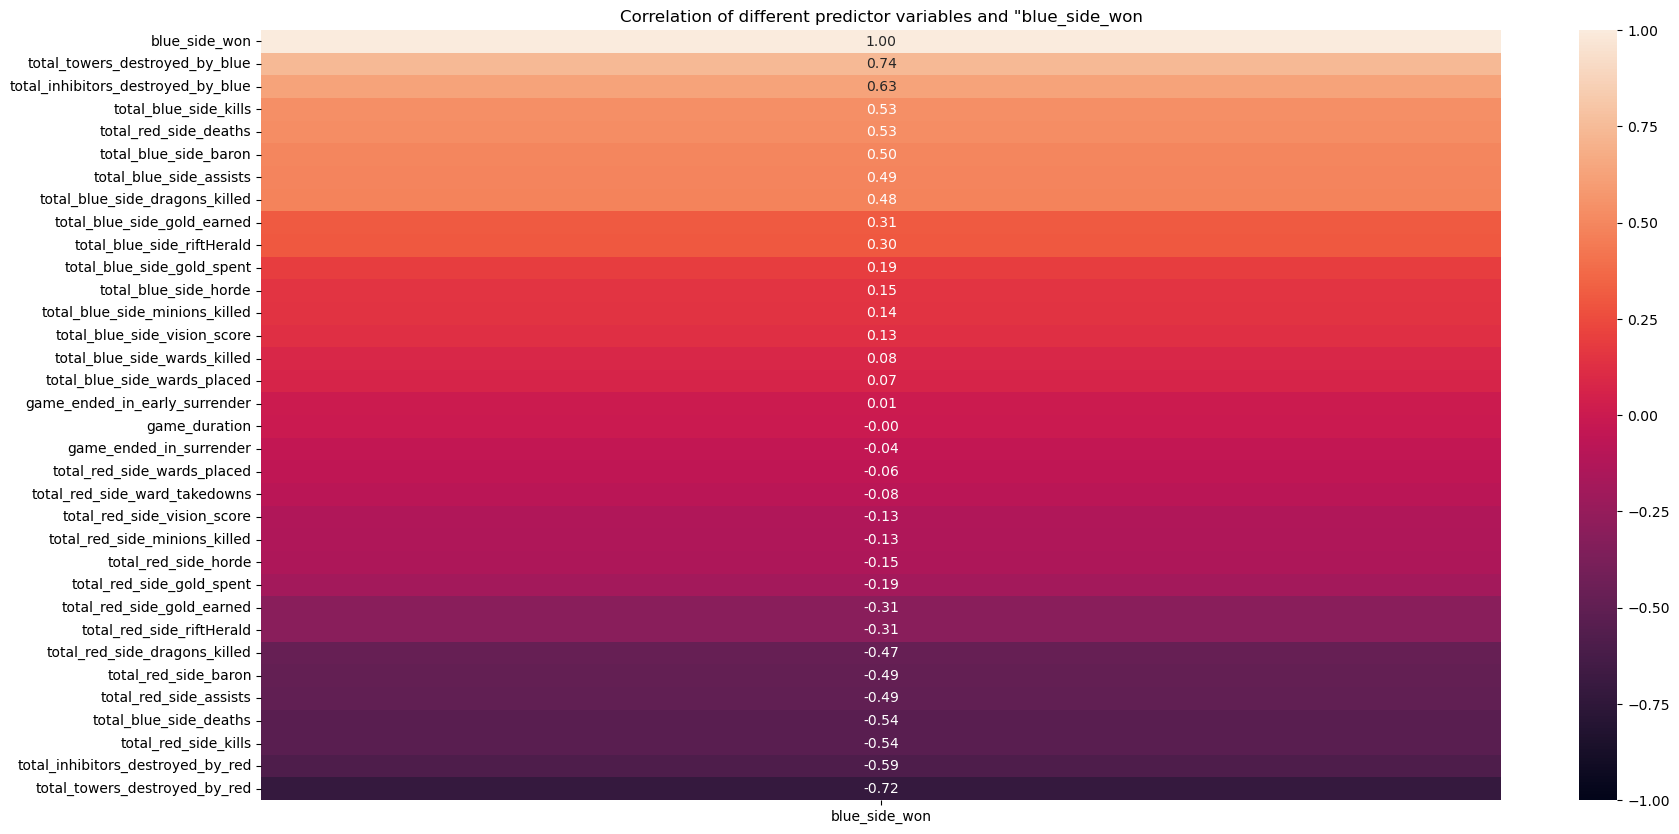

In [95]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr()[['blue_side_won']].sort_values(by='blue_side_won',ascending=False)
            ,vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('Correlation of different predictor variables and "blue_side_won')
plt.show()

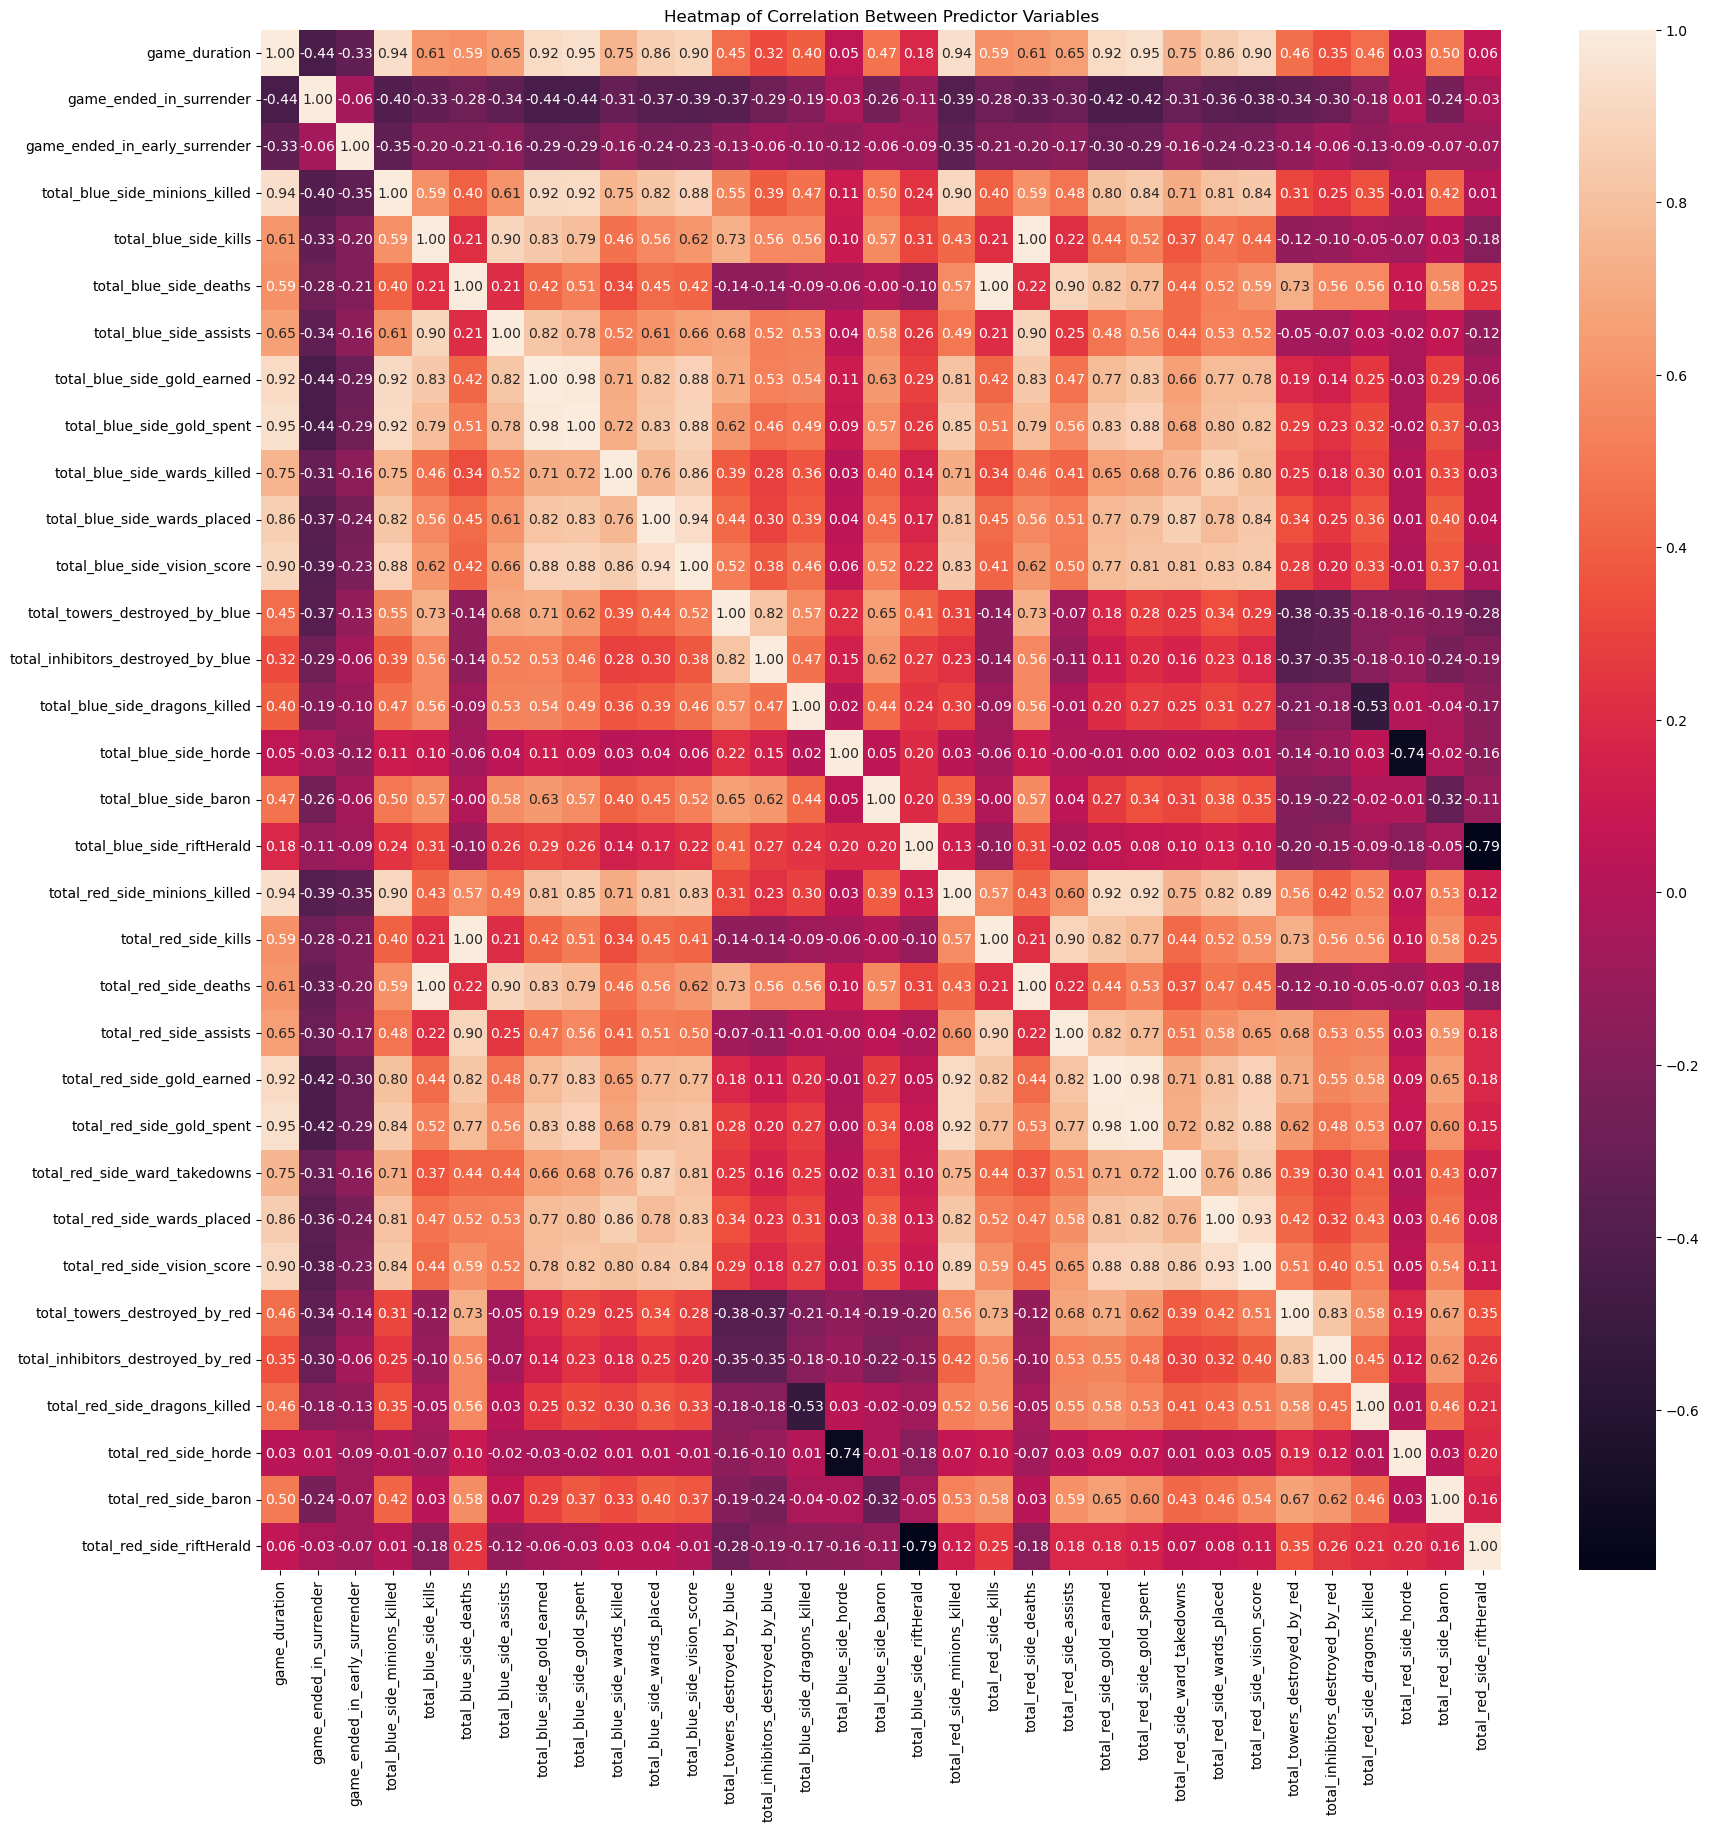

In [96]:


X = df.drop(columns=['blue_side_won'])
y = df['blue_side_won']

plt.figure(figsize=(20, 20))
sns.heatmap(X.corr(), cmap="rocket", annot=True, fmt='.2f')

plt.title("Heatmap of Correlation Between Predictor Variables")
plt.show()



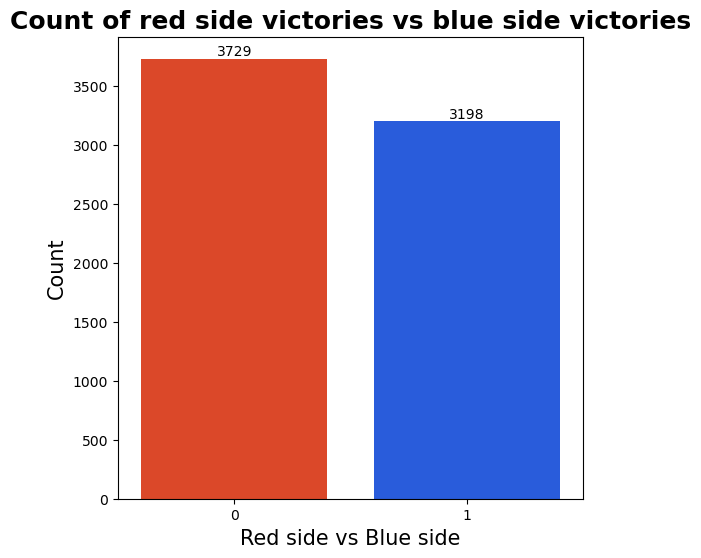

In [107]:
#Checking for data imbalance within our target variable.
#We can see that overall the data is relatively balanced. there are more instances of 0 than 1's suggesting that in our dataset, the red side have won more games
#palette = "Set1", hue='blue_side_won', dodge=False


figure, axes = plt.subplots(figsize=(6,6))
ax=sns.countplot(data=df, x= 'blue_side_won', ax = axes, palette=['#f8350c',"#0c50f8"])
ax.bar_label(ax.containers[0])
ax.set_title('Count of red side victories vs blue side victories', fontsize=18, fontweight='bold')
ax.set_xlabel('Red side vs Blue side', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
#ax.legend(labels=['Blue side victories', 'Red side victories'], loc=2, bbox_to_anchor=(1, 1))



plt.show()

In [104]:
df['blue_side_won'].unique()

array([0, 1], dtype=int64)

# Data pre-processing

In [ ]:
#converting categorical values into numerical values
df

,game_duration,game_ended_in_surrender,game_ended_in_early_surrender,blue_side_won,total_blue_side_minions_killed,total_blue_side_kills,total_blue_side_deaths,total_blue_side_assists,total_blue_side_gold_earned,total_blue_side_gold_spent,...,total_red_side_gold_spent,total_red_side_ward_takedowns,total_red_side_wards_placed,total_red_side_vision_score,total_towers_destroyed_by_red,total_inhibitors_destroyed_by_red,total_red_side_dragons_killed,total_red_side_horde,total_red_side_baron,total_red_side_riftHerald
0,1331,False,False,False,537,9,41,15,37713,34375,...,42450,9,37,82,11,3,2,0,0,1
1,1552,True,False,False,759,14,21,20,44515,43220,...,45900,26,43,146,8,2,2,0,1,0
2,917,True,False,True,506,24,8,22,36436,30735,...,21400,4,33,59,0,0,0,0,0,0
3,915,True,False,True,561,24,8,22,34724,29625,...,24112,5,36,62,0,0,0,0,0,0
4,2132,False,False,False,1051,28,36,31,65737,67345,...,68875,52,64,230,10,1,4,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6922,1960,False,False,False,978,29,35,52,60888,57300,...,65670,27,80,222,10,2,4,0,1,1
6923,1997,False,False,False,937,32,28,47,66587,65625,...,60985,25,79,185,7,1,4,0,1,0
6924,2195,False,False,False,1017,47,45,69,78831,71360,...,74960,39,87,225,9,2,2,2,2,0
6925,1336,True,False,True,748,31,15,58,49786,47300,...,36325,19,45,112,2,0,0,3,0,0


In [102]:
#converting categorical values (True and False) into numeric (1 and 0)
from sklearn.preprocessing import LabelEncoder 
df.replace({False: 0, True: 1}, inplace=True)


In [ ]:
#rearranging the dataset so that "blue_side_won" (target variable) is at the end
df = df[[col for col in df.columns if col !='blue_side_won'] + ['blue_side_won']]

In [ ]:
df

,game_duration,game_ended_in_surrender,game_ended_in_early_surrender,total_blue_side_minions_killed,total_blue_side_kills,total_blue_side_deaths,total_blue_side_assists,total_blue_side_gold_earned,total_blue_side_gold_spent,total_blue_side_wards_killed,...,total_red_side_ward_takedowns,total_red_side_wards_placed,total_red_side_vision_score,total_towers_destroyed_by_red,total_inhibitors_destroyed_by_red,total_red_side_dragons_killed,total_red_side_horde,total_red_side_baron,total_red_side_riftHerald,blue_side_won
0,1331,0,0,537,9,41,15,37713,34375,7,...,9,37,82,11,3,2,0,0,1,0
1,1552,1,0,759,14,21,20,44515,43220,14,...,26,43,146,8,2,2,0,1,0,0
2,917,1,0,506,24,8,22,36436,30735,12,...,4,33,59,0,0,0,0,0,0,1
3,915,1,0,561,24,8,22,34724,29625,12,...,5,36,62,0,0,0,0,0,0,1
4,2132,0,0,1051,28,36,31,65737,67345,25,...,52,64,230,10,1,4,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6922,1960,0,0,978,29,35,52,60888,57300,42,...,27,80,222,10,2,4,0,1,1,0
6923,1997,0,0,937,32,28,47,66587,65625,28,...,25,79,185,7,1,4,0,1,0,0
6924,2195,0,0,1017,47,45,69,78831,71360,41,...,39,87,225,9,2,2,2,2,0,0
6925,1336,1,0,748,31,15,58,49786,47300,12,...,19,45,112,2,0,0,3,0,0,1


In [ ]:
#splitting dataset into x and y
X = df.drop('blue_side_won', axis=1)
y=df['blue_side_won']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

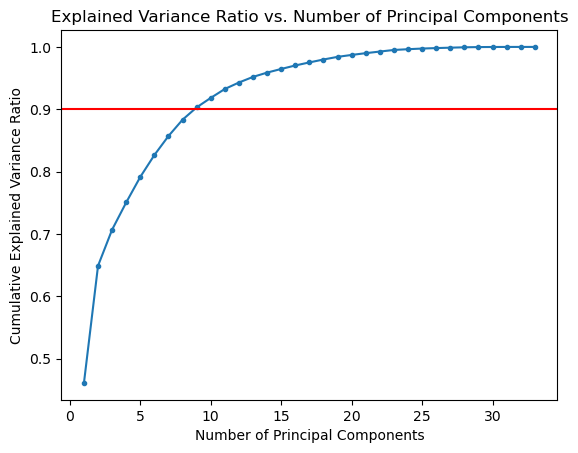

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='.')
plt.axhline(y = 0.9, color = 'r', linestyle = '-') 
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

In [ ]:
#splitting dataset into testing and training sets
#we will use 80% of the data to train our models and the remaining 20% of it to test our models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# LOOK INTO SCALING METHODS